Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Collecting the data

In [2]:
data = pd.read_csv(r"C:\Users\user\Downloads\database_IND.csv")

Exploratory Data Analysis (Non-Graphical Analysis) 

In [3]:
# Printing the first 30 rows from the dataset
data.head(30)

country country_long                                 name   gppd_idnr  \
0      IND        India                     ACME Solar Tower  WRI1020239   
1      IND        India                  ADITYA CEMENT WORKS  WRI1019881   
2      IND        India             AES Saurashtra Windfarms  WRI1026669   
3      IND        India                          AGARTALA GT  IND0000001   
4      IND        India                         AKALTARA TPP  IND0000002   
5      IND        India                         AKRIMOTA LIG  IND0000003   
6      IND        India                               ALIYAR  IND0000004   
7      IND        India                      ALLAIN DUHANGAN  IND0000005   
8      IND        India                          ALMATTI DAM  IND0000006   
9      IND        India                          AMAR KANTAK  IND0000007   
10     IND        India                        AMARAVATI TPP  IND0000008   
11     IND        India               ANANDPUR SAHIB ST-I&II  IND0000009   
12     IND        India                          ANAPARA "C"  IND0000010   
13     IND        India                               ANDHRA  IND0000011   
14     IND        India                    ANOOPGARH ST I&II  IND0000012   
15     IND        India                               ANPARA  IND0000013   
16     IND        India                              ANTA GT  IND0000014   
17     IND        India                              ANUPPUR  WRI1019996   
18     IND        India                           ANUPUR TPP  IND0000015   
19     IND        India                    ARVINDNAGAR SUGAR  WRI1019938   
20     IND        India                      ASHOKNAGAR MILL  WRI1019939   
21     IND        India                         ATHANI SUGAR  WRI1019904   
22     IND        India                           AURAIYA GT  IND0000016   
23     IND        India                  AVANTHA BHANDAR TPP  IND0000017   
24     IND        India                 AWARPUR CEMENT PLANT  WRI1019940   
25     IND        India                             Abhijeet  WRI1020238   
26     IND        India            Amarsar Solar Power Plant  WRI1026104   
27     IND        India                    Anabura Wind Farm  WRI1026069   
28     IND        India  Ananthapur - Meil Solar Power Plant  WRI1026105   
29     IND        India                Andrha Lake Wind Farm  WRI1026768   

    capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0          2.50   28.1839    73.2407        Solar         NaN         NaN   
1         98.00   24.7663    74.6090         Coal         NaN         NaN   
2         39.20   21.9038    69.3732         Wind         NaN         NaN   
3        135.00   23.8712    91.3602          Gas         NaN         NaN   
4       1800.00   21.9603    82.4091         Coal         Oil         NaN   
5        250.00   23.7689    68.6447         Coal         Oil         NaN   
6         60.00   10.4547    77.0078        Hydro         NaN         NaN   
7        192.00   32.2258    77.2070        Hydro         NaN         NaN   
8        290.00   16.3300    75.8863        Hydro         NaN         NaN   
9        210.00   23.1642    81.6373         Coal         Oil         NaN   
10      1350.00   21.0782    77.9009         Coal         Oil         NaN   
11       134.00   31.2717    76.4938        Hydro         NaN         NaN   
12      1200.00   24.2007    82.8000         Coal         Oil         NaN   
13        16.95   31.2412    77.8769        Hydro         NaN         NaN   
14         9.00       NaN        NaN        Hydro         NaN         NaN   
15      2630.00   24.2010    82.7891         Coal         Oil         NaN   
16       419.33   25.1797    76.3188          Gas         NaN         NaN   
17       600.00   23.0666    81.7841         Coal         NaN         NaN   
18      1200.00   23.0655    81.7865         Coal         Oil         NaN   
19        10.00   18.0845    76.1851      Biomass         NaN         NaN   
20        17.00   19.5867    

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Our dataset contains 907 rows and 27 columns, Out of 27 columns 15 are of float type and 12 are object.

In [5]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Lot of columns in the dataset contains Null values, some of the features contains only Null Values. We will have to drop these features as imputing these values might disrupt our whole model. 

In [6]:
# Calculating the percentage of null values in features that contain null values.
a=(data['other_fuel1'].isnull().sum()/len(data['other_fuel1'])*100).round(2)
b=(data['other_fuel2'].isnull().sum()/len(data['other_fuel1'])*100).round(2)
c=(data['other_fuel3'].isnull().sum()/len(data['other_fuel1'])*100).round(2)
d=(data['generation_gwh_2013'].isnull().sum()/len(data['generation_gwh_2013'])*100).round(2)
e=(data['generation_gwh_2014'].isnull().sum()/len(data['generation_gwh_2014'])*100).round(2)
f=(data['generation_gwh_2015'].isnull().sum()/len(data['generation_gwh_2015'])*100).round(2)
g=(data['generation_gwh_2016'].isnull().sum()/len(data['generation_gwh_2016'])*100).round(2)
h=(data['generation_gwh_2017'].isnull().sum()/len(data['generation_gwh_2017'])*100).round(2)
i=(data['generation_gwh_2018'].isnull().sum()/len(data['generation_gwh_2018'])*100).round(2)
j=(data['generation_gwh_2019'].isnull().sum()/len(data['generation_gwh_2019'])*100).round(2)

print(f"The percentage of null values in features are:- \n{a}, \n{b}, \n{c}, \n{d}, \n{e}, \n{f}, \n{g}, \n{h}, \n{i}, \n{j}")

The percentage of null values in features are:- 
78.17, 
99.89, 
100.0, 
100.0, 
56.12, 
53.47, 
52.15, 
51.49, 
50.61, 
100.0


In [7]:
data.describe()

capacity_mw    latitude   longitude  other_fuel3  commissioning_year  \
count   907.000000  861.000000  861.000000          0.0          527.000000   
mean    326.223755   21.197918   77.464907          NaN         1997.091082   
std     590.085456    6.239612    4.939316          NaN           17.082868   
min       0.000000    8.168900   68.644700          NaN         1927.000000   
25%      16.725000   16.773900   74.256200          NaN         1988.000000   
50%      59.200000   21.780000   76.719500          NaN         2001.000000   
75%     385.250000   25.512400   79.440800          NaN         2012.000000   
max    4760.000000   34.649000   95.408000          NaN         2018.000000   

       wepp_id  year_of_capacity_data  generation_gwh_2013  \
count      0.0                  519.0                  0.0   
mean       NaN                 2019.0                  NaN   
std        NaN                    0.0                  NaN   
min        NaN                 2019.0                  NaN   
25%        NaN                 2019.0                  NaN   
50%        NaN                 2019.0                  NaN   
75%        NaN                 2019.0                  NaN   
max        NaN                 2019.0                  NaN   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count           398.000000           422.000000           434.000000   
mean           2431.823590          2428.226946          2467.936859   
std            4026.440035          4194.596959          4162.884308   
min               0.000000             0.000000             0.000000   
25%             223.557672           176.381063           188.285252   
50%             801.123775           711.181225           737.205450   
75%            3035.306250          3084.121250          3282.861313   
max           28127.000000         30539.000000         30015.000000   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
count           440.000000           448.000000                  0.0   
mean           2547.759305          2600.804099                  NaN   
std            4196.991169          4314.880456                  NaN   
min               0.000000             0.000000                  NaN   
25%             177.874930           193.378250                  NaN   
50%             817.977250           751.644375                  NaN   
75%            3275.690475          3143.535900                  NaN   
max           35116.000000         35136.000000                  NaN   

       estimated_generation_gwh  
count                       0.0  
mean                        NaN  
std                         NaN  
min                         NaN  
25%                         NaN  
50%                         NaN  
75%                         NaN  
max                         NaN

In [8]:
data['primary_fuel'].value_counts()

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: count, dtype: int64

In [9]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [10]:
data.drop(['country', 'country_long','other_fuel1', 'other_fuel2','other_fuel3', 'source', 'url','geolocation_source', 'wepp_id', 'year_of_capacity_data','generation_data_source', 'estimated_generation_gwh'],inplace=True,axis=1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 907 non-null    object 
 1   gppd_idnr            907 non-null    object 
 2   capacity_mw          907 non-null    float64
 3   latitude             861 non-null    float64
 4   longitude            861 non-null    float64
 5   primary_fuel         907 non-null    object 
 6   commissioning_year   527 non-null    float64
 7   owner                342 non-null    object 
 8   generation_gwh_2013  0 non-null      float64
 9   generation_gwh_2014  398 non-null    float64
 10  generation_gwh_2015  422 non-null    float64
 11  generation_gwh_2016  434 non-null    float64
 12  generation_gwh_2017  440 non-null    float64
 13  generation_gwh_2018  448 non-null    float64
 14  generation_gwh_2019  0 non-null      float64
dtypes: float64(11), object(4)
memory usage: 

In [12]:
data.drop(['generation_gwh_2019'],inplace=True,axis=1)

In [13]:
generation_cols = ['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
data[generation_cols] = data[generation_cols].fillna(data[generation_cols].median())
data['longitude'].fillna(data['longitude'].mean(),inplace=True)
data['latitude'].fillna(data['latitude'].mean(),inplace=True)
data.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2013    907
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

Exploratory Data Analysis ( Graphical ) 

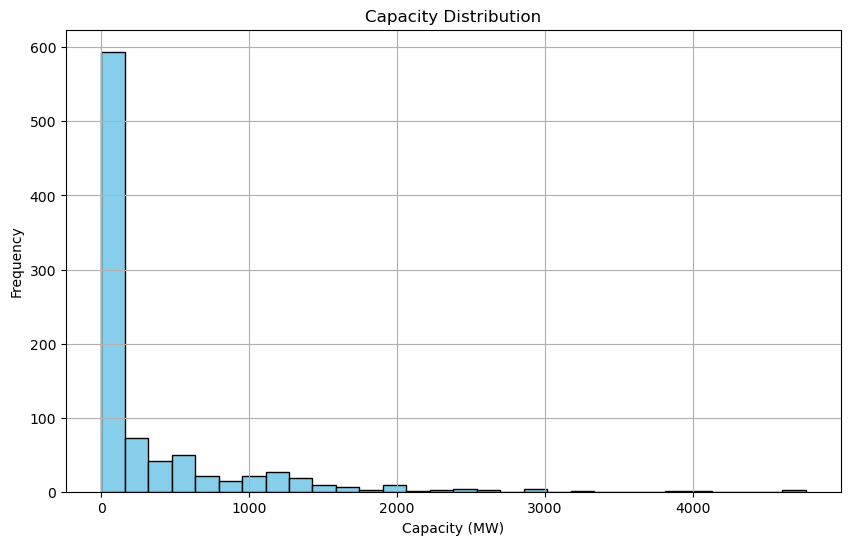

In [14]:
plt.figure(figsize=(10,6))
plt.hist(data['capacity_mw'],bins=30,color='skyblue',edgecolor='black')
plt.title('Capacity Distribution')
plt.xlabel('Capacity (MW)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Capacity Distribution: Histogram of the capacity_mw column to visualize the distribution of power plant capacities.

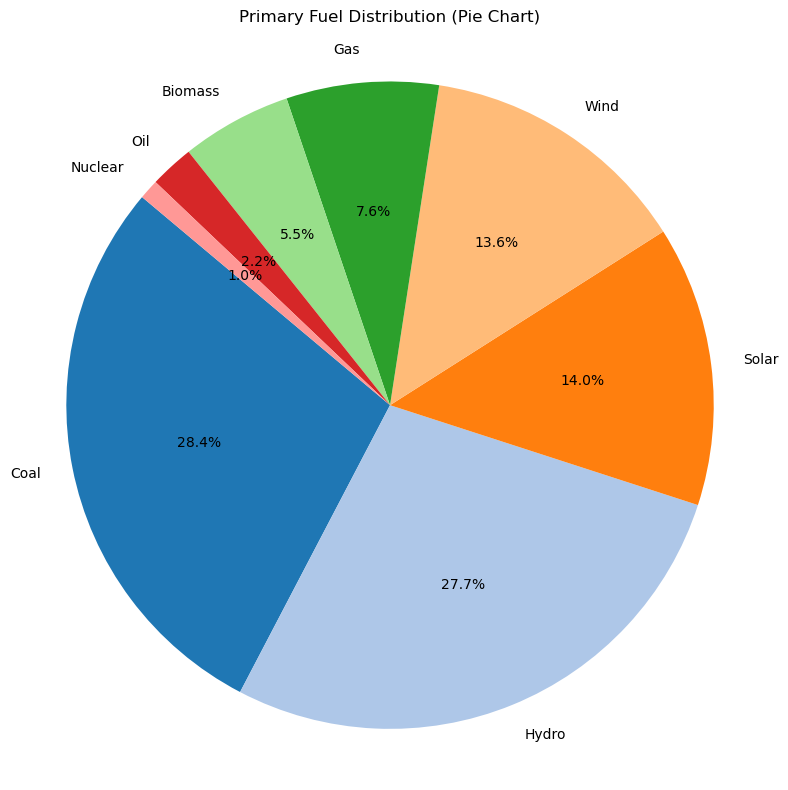

In [15]:
fuel_distribution = data['primary_fuel'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(fuel_distribution,labels=fuel_distribution.index,autopct='%1.1f%%',startangle=140,colors=plt.cm.tab20.colors)
plt.title('Primary Fuel Distribution (Pie Chart)')
plt.axis('equal')
plt.tight_layout()
plt.show()

Primary Fuel Distribution: Pie chart to visualize the distribution of primary fuel types across power plants shows:-

1. Coal is the most commonly used primary source of fuel in power plants, accounting for 28.4%.
2. Followed by Hydro energy with a usage of 27.7% 
3. Solar power comes at 3rd with a consumption of 14.0% 

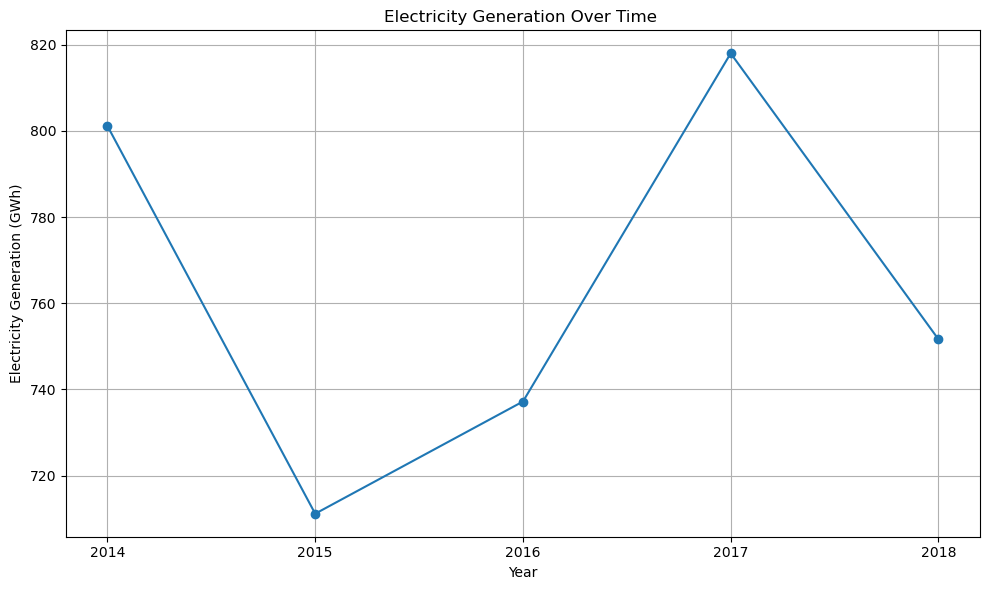

In [16]:
generation_cols = ['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
plt.figure(figsize=(10,6))
plt.plot(data.loc[0,generation_cols],marker='o',linestyle='-')
plt.title('Electricity Generation Over Time ')
plt.xlabel('Year')
plt.ylabel('Electricity Generation (GWh)')
plt.xticks(range(len(generation_cols)), [col[-4:]for col in generation_cols])
plt.grid(True)
plt.tight_layout()
plt.show()

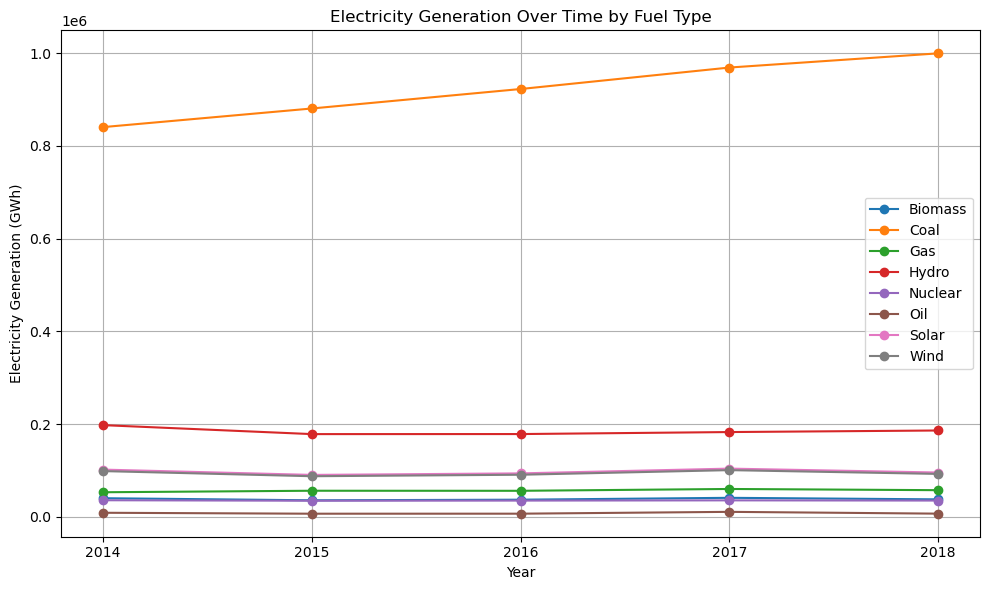

In [17]:
generation_columns = ['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']
fuel_type_generation = data.groupby('primary_fuel')[generation_columns].sum()
plt.figure(figsize=(10, 6))
for fuel_type in fuel_type_generation.index:
    plt.plot(fuel_type_generation.loc[fuel_type], marker='o', linestyle='-', label=fuel_type)
plt.title('Electricity Generation Over Time by Fuel Type')
plt.xlabel('Year')
plt.ylabel('Electricity Generation (GWh)')
plt.xticks(range(len(generation_columns)), [col[-4:] for col in generation_columns])  
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Generation Over Time: line chart to visualize the electricity generation (generation_gwh_2014 to generation_gwh_2018 columns) over time for different power plants or aggregated by fuel type.

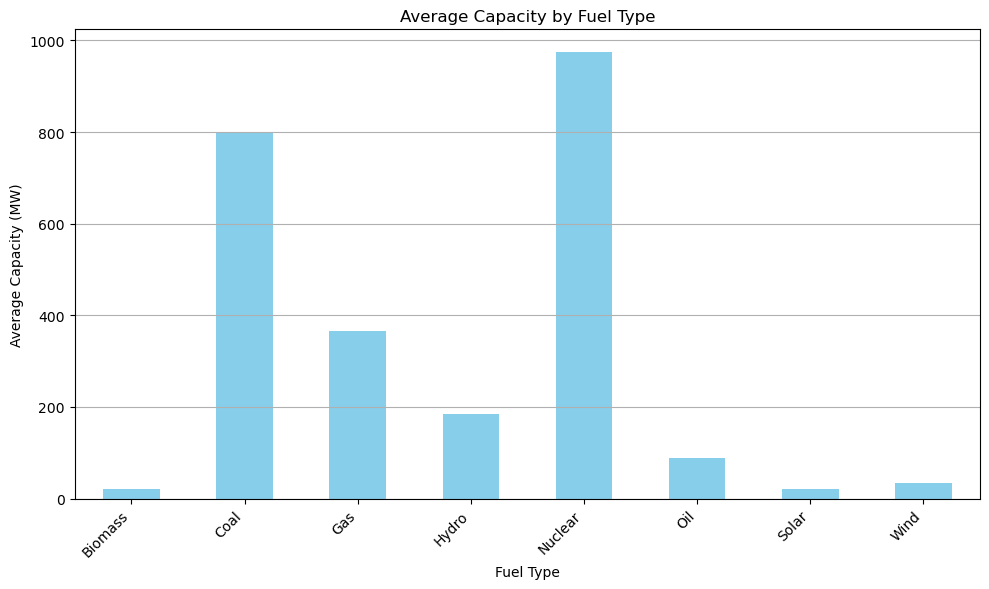

In [18]:
fuel_type_cap = data.groupby('primary_fuel')['capacity_mw'].mean()
plt.figure(figsize=(10,6))
fuel_type_cap.plot(kind='bar',color='skyblue')
plt.title('Average Capacity by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Capacity (MW)')
plt.xticks(rotation = 45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Fuel Type vs. Capacity: Grouped bar plot to compare the capacity distribution of power plants across different fuel types:- 

1. Nuclear Power plants generate the most electricty with average capacity of 980 (MW). 
2. Coal power plants comes second with average capacity of 800(MW). 
3. Gas plants have the capabilty to generate 380 (MW) of electricity. 

In [19]:
import folium 

In [20]:
map_center = [data['latitude'].mean(), data['longitude'].mean()]
map_zoom = 3
power_plant_map = folium.Map(location = map_center, xoom_start = map_zoom)

for index, row in data.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup = row['name']).add_to(power_plant_map)
    
power_plant_map

Geographical Distribution: Geographical distribution of power plants on a map using latitude and longitude coordinates (latitude and longitude columns) using folium to visualize the concentration of power plants in different regions.

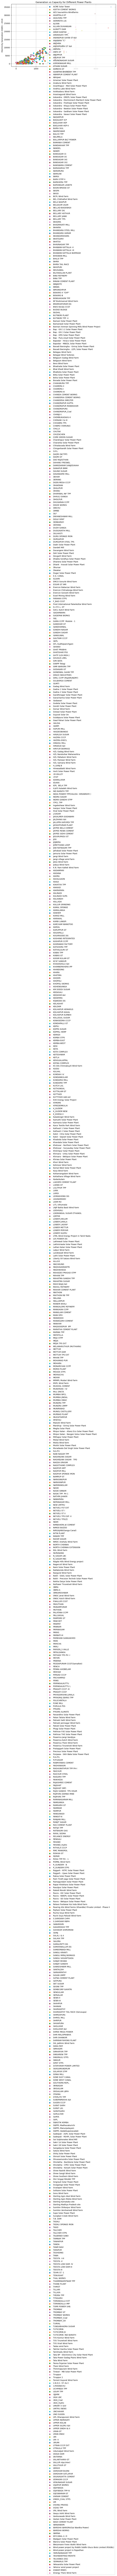

In [21]:
plt.figure(figsize=(10,6))
for index, row in data.iterrows():
    plt.scatter(row['capacity_mw'],row['generation_gwh_2018'],label=row['name'])
    
plt.title('Generation vs Capacity for Different Power Plants')
plt.xlabel('Capacity (MW)')
plt.ylabel('Electricity Generation (GWh) - 2018')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

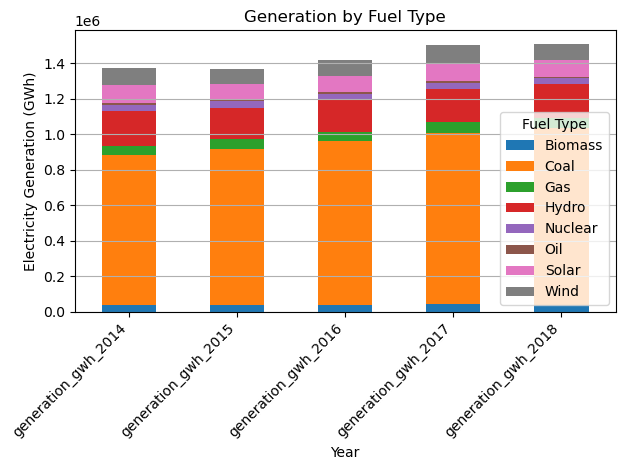

In [22]:
plt.figure(figsize=(10, 8))
fuel_type_generation.T.plot(kind='bar', stacked=True)
plt.title('Generation by Fuel Type')
plt.xlabel('Year')
plt.ylabel('Electricity Generation (GWh)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fuel Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

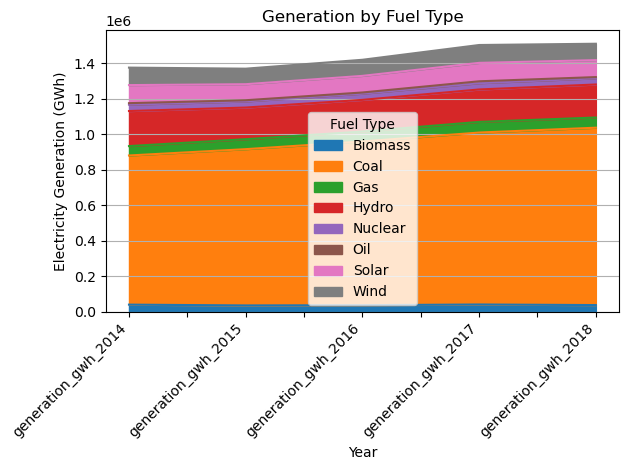

In [23]:
plt.figure(figsize=(10, 8))
fuel_type_generation.T.plot(kind='area', stacked=True)
plt.title('Generation by Fuel Type')
plt.xlabel('Year')
plt.ylabel('Electricity Generation (GWh)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fuel Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [24]:
data.drop(['owner','name','gppd_idnr','commissioning_year'],inplace=True,axis=1)

In [25]:
data.drop('generation_gwh_2013',inplace=True,axis=1)

Generation by Fuel Type: To visualize the contribution of different fuel types to electricity generation over time.

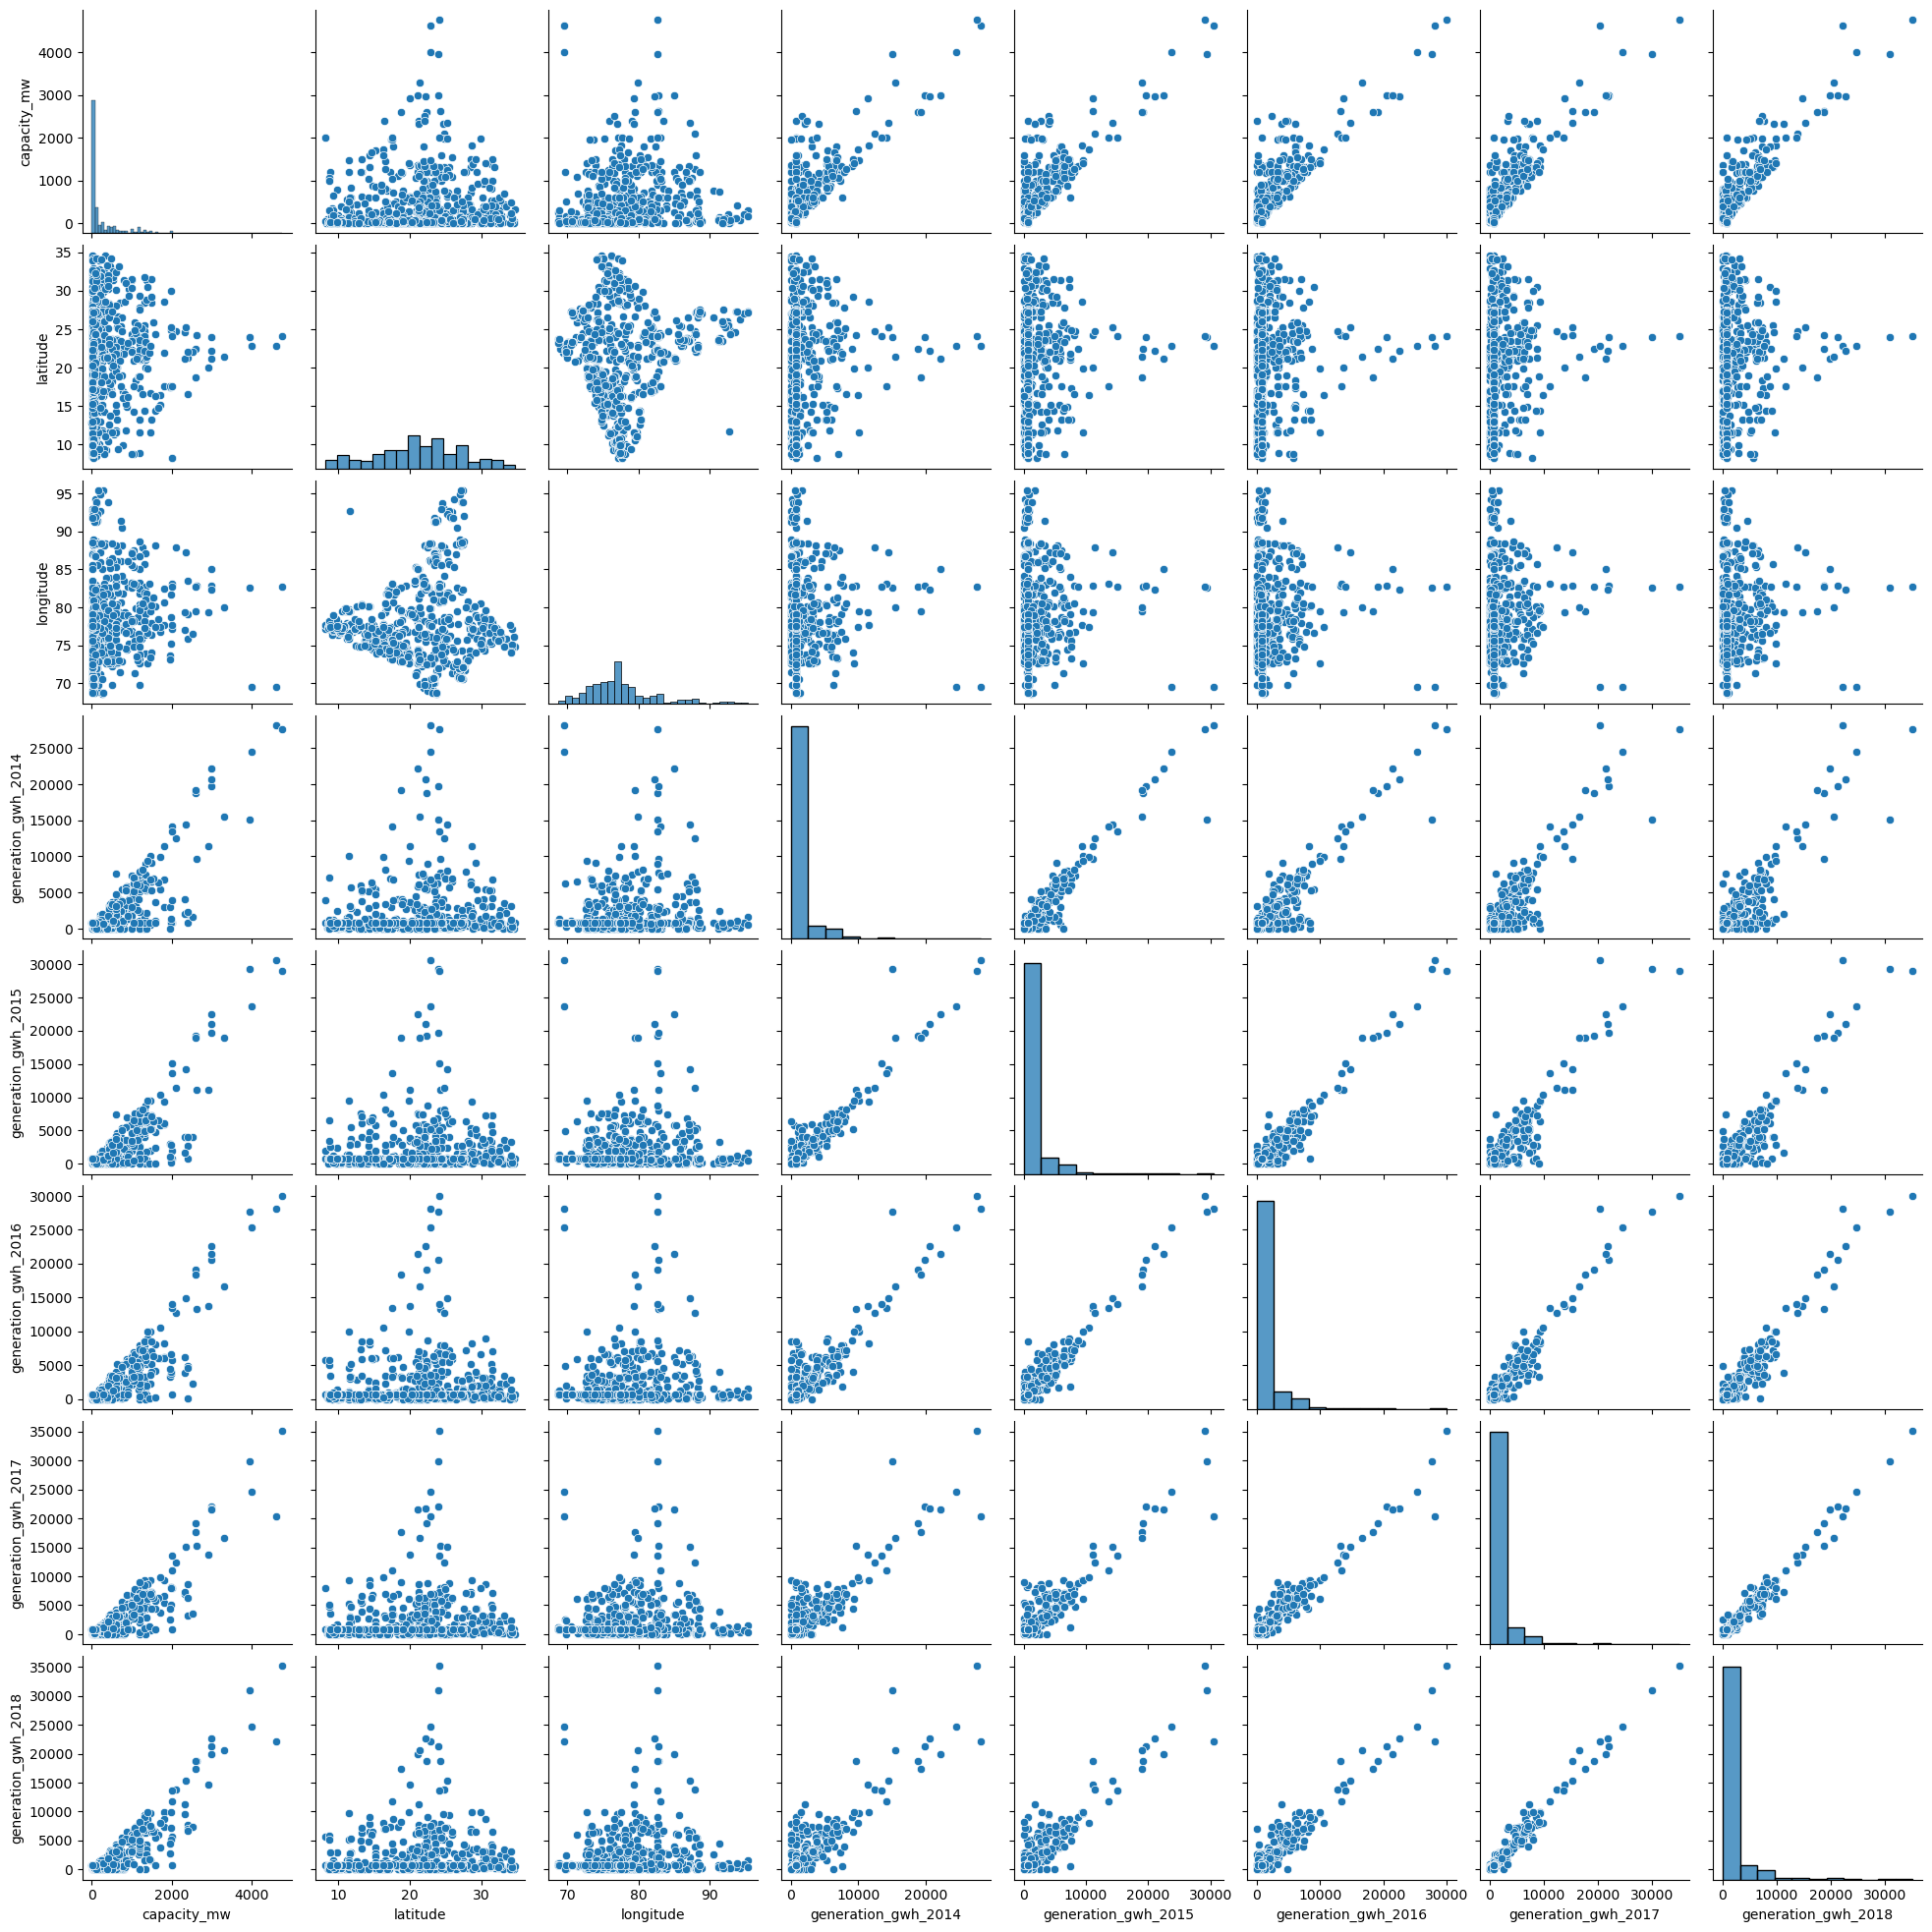

In [26]:
sns.pairplot(data)

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['primary_fuel'] = encoder.fit_transform(data['primary_fuel'])

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    int32  
 4   generation_gwh_2014  907 non-null    float64
 5   generation_gwh_2015  907 non-null    float64
 6   generation_gwh_2016  907 non-null    float64
 7   generation_gwh_2017  907 non-null    float64
 8   generation_gwh_2018  907 non-null    float64
dtypes: float64(8), int32(1)
memory usage: 60.4 KB


In [69]:
# Checking correlation between variables.
data.corr()

capacity_mw  latitude  longitude  primary_fuel  \
capacity_mw             1.000000  0.063997   0.306452     -0.534468   
latitude                0.063997  1.000000   0.036362     -0.010204   
longitude               0.306452  0.036362   1.000000     -0.347948   
primary_fuel           -0.534468 -0.010204  -0.347948      1.000000   
generation_gwh_2014     0.176494  0.095297  -0.004104     -0.057729   
generation_gwh_2015     0.211043  0.092479  -0.001013     -0.078770   
generation_gwh_2016     0.232324  0.129201   0.050497     -0.100347   
generation_gwh_2017     0.198515  0.103763   0.024108     -0.066921   
generation_gwh_2018     0.200824  0.119812   0.042072     -0.081195   

                     generation_gwh_2014  generation_gwh_2015  \
capacity_mw                     0.176494             0.211043   
latitude                        0.095297             0.092479   
longitude                      -0.004104            -0.001013   
primary_fuel                   -0.057729            -0.078770   
generation_gwh_2014             1.000000             0.762307   
generation_gwh_2015             0.762307             1.000000   
generation_gwh_2016             0.730773             0.842981   
generation_gwh_2017             0.632067             0.674807   
generation_gwh_2018             0.661392             0.705933   

                     generation_gwh_2016  generation_gwh_2017  \
capacity_mw                     0.232324             0.198515   
latitude                        0.129201             0.103763   
longitude                       0.050497             0.024108   
primary_fuel                   -0.100347            -0.066921   
generation_gwh_2014             0.730773             0.632067   
generation_gwh_2015             0.842981             0.674807   
generation_gwh_2016             1.000000             0.823492   
generation_gwh_2017             0.823492             1.000000   
generation_gwh_2018             0.847598             0.876779   

                     generation_gwh_2018  
capacity_mw                     0.200824  
latitude                        0.119812  
longitude                       0.042072  
primary_fuel                   -0.081195  
generation_gwh_2014             0.661392  
generation_gwh_2015             0.705933  
generation_gwh_2016             0.847598  
generation_gwh_2017             0.876779  
generation_gwh_2018             1.000000

<Axes: >

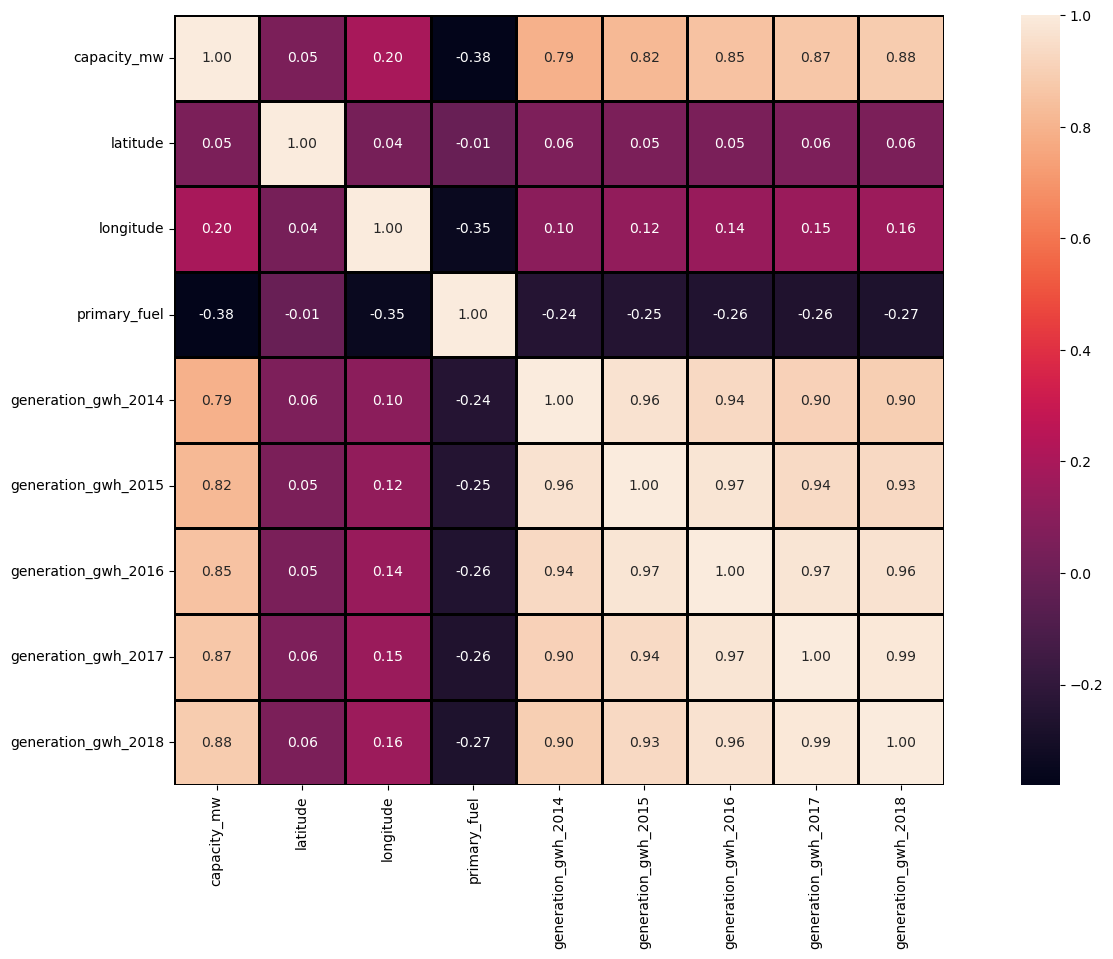

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,linecolor='black',linewidths=1,fmt='.2f',square=True)

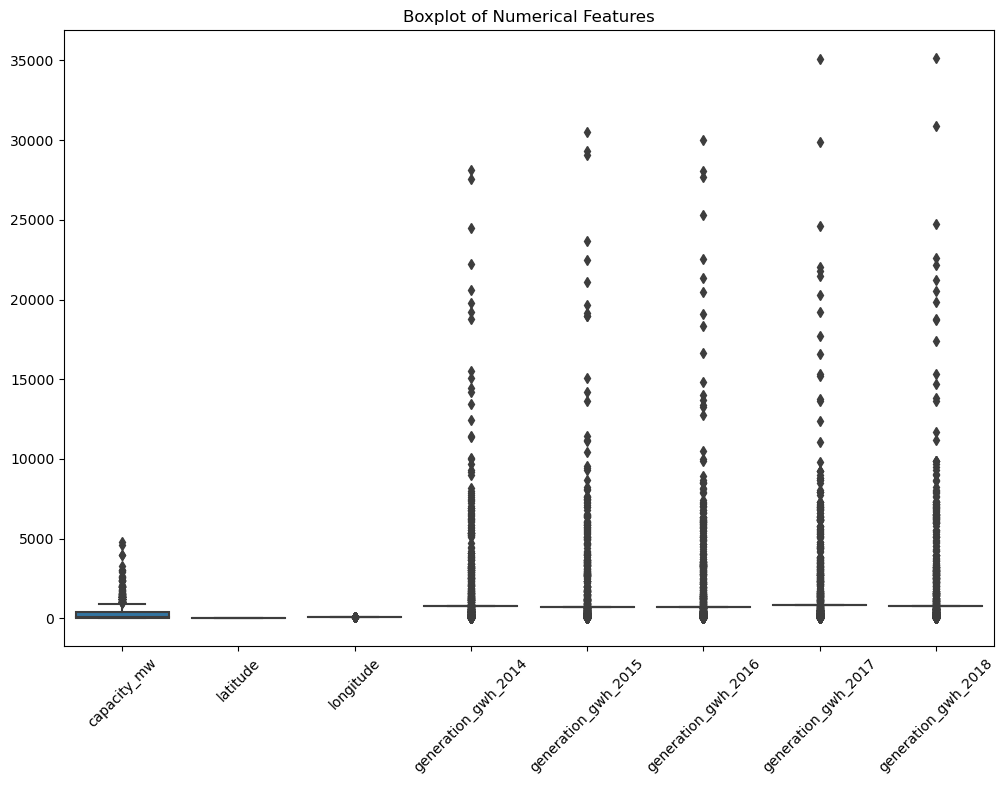

In [31]:
# Checking for outliers in the features
numerical_features = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12,8))
sns.boxplot(data=numerical_features)
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation = 45)
plt.show()

In [32]:
# Treating outliers using z-score transformation
from scipy import stats
z_score = np.abs(stats.zscore(numerical_features))
threshold=3
outlier = np.argwhere(z_score>threshold)
for index in outlier:
    feature_index, sample_index = index
    if feature_index < numerical_features.shape[1]:
        median_value = np.median(numerical_features.iloc[:,feature_index])
        data.iloc[sample_index, feature_index] = median_value
    
print('Number of Outliers treated:', len(outlier))

Number of Outliers treated: 119


In [33]:
# Checking for skewness in the features
data.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.141881
primary_fuel           0.472251
generation_gwh_2014    5.321360
generation_gwh_2015    5.566773
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2018    5.133226
dtype: float64

In [34]:
# Treating skewness using np.log1p transformation.
from scipy.stats import skew
skewed_features = ['capacity_mw', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']
for features in skewed_features:
    if abs(skew(data[features]))>1:
        data[features] = np.log1p(data[features])
        
print('Skewness after treatment')
print(data[skewed_features].apply(lambda x: skew(x)))

Skewness after treatment
capacity_mw            0.135230
generation_gwh_2014   -2.217456
generation_gwh_2015   -1.889134
generation_gwh_2016   -1.874078
generation_gwh_2017   -1.961135
generation_gwh_2018   -1.924658
dtype: float64


Creating a model

Support Vector Machine (classifier) 

In [44]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder

In [45]:
# Splitting data into test data and train data
x = data.drop('primary_fuel',axis=1)
y = data['primary_fuel']

In [46]:
# Using train_test_split to split the data while also using standard scaler to scale the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [47]:
# Creating a model
model = SVC(kernel='rbf',random_state=100)
model.fit(x_train,y_train)

SVC(random_state=100)

In [48]:
y_pred = model.predict(x_test_scaled)

In [49]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)
print('\nClassification Report:')
print(classification_report(y_test,y_pred))

Accuracy: 0.3021978021978022

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        18
           3       0.30      1.00      0.46        55
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00        23
           7       0.00      0.00      0.00        25

    accuracy                           0.30       182
   macro avg       0.04      0.14      0.07       182
weighted avg       0.09      0.30      0.14       182



The accuracy is way less than expected using SVC, 30% 

Creating a different model

Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [52]:
model = LogisticRegression(random_state=100)
model.fit(x_train,y_train)

LogisticRegression(random_state=100)

In [53]:
y_pred = model.predict(x_test_scaled)

In [54]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
print("\nClassification Report:")
print(classification_report(y_test,y_pred))

Accuracy: 0.25274725274725274

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.39      0.32      0.35        50
           2       0.14      0.11      0.12        18
           3       0.50      0.02      0.04        55
           4       0.00      0.00      0.00         0
           5       0.11      1.00      0.19         2
           6       0.27      0.87      0.41        23
           7       0.62      0.20      0.30        25

    accuracy                           0.25       182
   macro avg       0.25      0.31      0.18       182
weighted avg       0.39      0.25      0.22       182



Logistic Regression gives us an accuracy of 25%, which is even less than what SVC predicted.

Creating a third model

Random Forest Classifier

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [57]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [58]:
y_pred = model.predict(x_test)

In [59]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)
print('\nClassification Report')
print(classification_report(y_test,y_pred))

Accuracy: 0.6923076923076923

Classification Report
              precision    recall  f1-score   support

           0       0.55      0.67      0.60         9
           1       0.72      0.78      0.75        50
           2       0.50      0.17      0.25        18
           3       0.76      0.75      0.75        55
           5       0.20      0.50      0.29         2
           6       0.78      0.78      0.78        23
           7       0.62      0.72      0.67        25

    accuracy                           0.69       182
   macro avg       0.59      0.62      0.58       182
weighted avg       0.69      0.69      0.68       182



Random Forest gives us an accyracy of 69% whicch is better than the previous 2 models.

Creating a model for predicting capacity_mw, for this we will need to create a regrression model 

Linear Regression 

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler

In [61]:
x = data.drop(['capacity_mw'],axis=1)
y = data['capacity_mw']

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [63]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [64]:
model1 = LinearRegression()
model1.fit(x_train_scaled,y_train)

LinearRegression()

In [66]:
y_pred = model1.predict(x_test_scaled)

In [67]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [68]:
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-Squared', r2)

Mean Squared Error: 2.410907004445287
Mean Absolute Error: 1.3328617076054512
R-Squared 0.33565591780937876


Mean Squared Error (MSE): This metric measures the average squared difference between the actual values (y_true) and the predicted values (y_pred). MSE is calculated by taking the average of the squared residuals. Lower values of MSE indicate better performance. In this case, the MSE is approximately 2.41, which means, on average, the squared difference between the actual and predicted values is around 2.41.

Mean Absolute Error (MAE): MAE measures the average absolute difference between the actual values and the predicted values. It is calculated by taking the average of the absolute residuals. Like MSE, lower values of MAE indicate better performance. In this case, the MAE is approximately 1.33, which means, on average, the absolute difference between the actual and predicted values is around 1.33.